In [1]:
import pandas as pd 

In [3]:
import numpy as np 

In [5]:
import matplotlib.pyplot as plt 

In [7]:
import seaborn as sns 

In [9]:
from sklearn.model_selection import train_test_split 

In [11]:
from sklearn.preprocessing import LabelEncoder, StandardScaler 

In [13]:
from sklearn.linear_model import LogisticRegression 

In [15]:
from sklearn.ensemble import RandomForestClassifier 

In [17]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

## Loading Dataset

In [20]:
data = pd.read_csv("Telco-Customer-Churn.csv")

## Quick Look at the Data

In [23]:
print(data.head()) 
print(data.info())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

## Cleaning Dataset

In [26]:
data = data.replace(" ", np.nan) 
data = data.dropna()
data["TotalCharges"] = pd.to_numeric(data["TotalCharges"])
data = data.drop("customerID", axis=1)

## Encoding Categorical Variables

In [29]:
le = LabelEncoder() 
for col in data.select_dtypes(include=['object']).columns: 
    data[col] = le.fit_transform(data[col])

## Correlation Heatmap

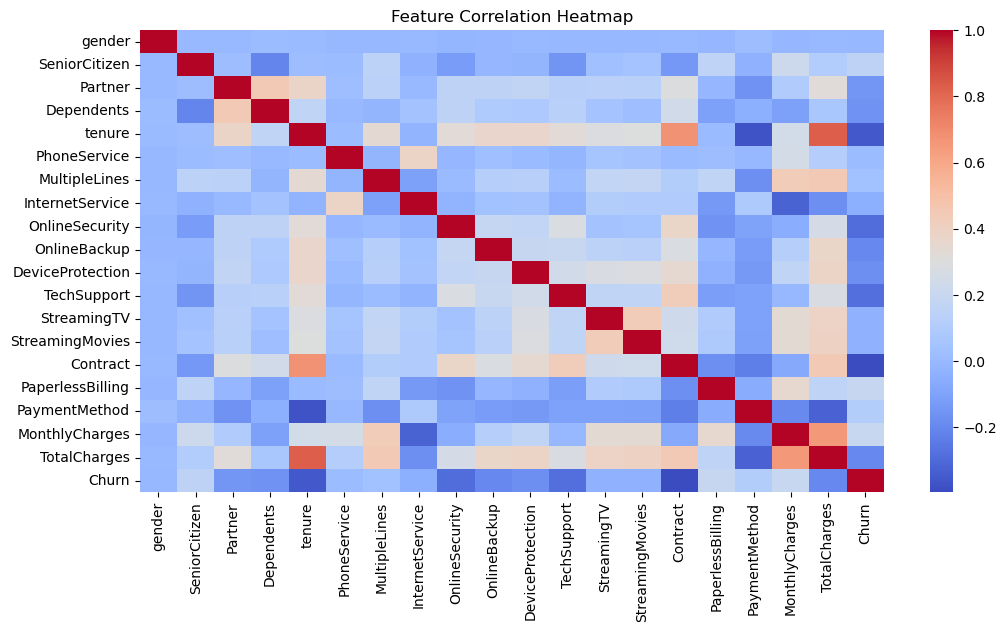

In [32]:
plt.figure(figsize=(12,6)) 
sns.heatmap(data.corr(), cmap="coolwarm", annot=False) 
plt.title("Feature Correlation Heatmap") 
plt.show()

## Churn Distribution

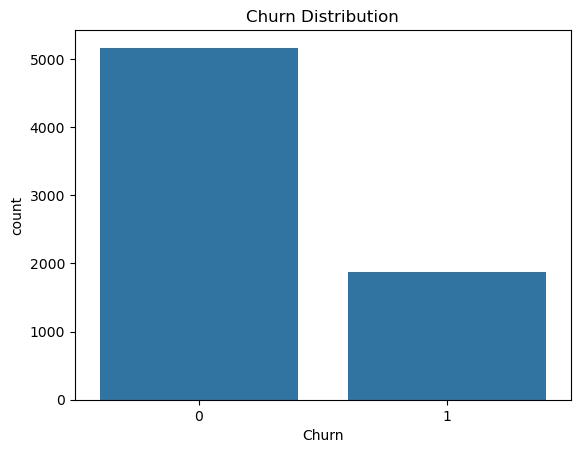

In [34]:
sns.countplot(x="Churn", data=data) 
plt.title("Churn Distribution") 
plt.show()

## Splitting Data

In [55]:
X = data.drop("Churn", axis=1) 
y = data["Churn"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Scale Features

In [58]:
scaler = StandardScaler() 
X_train = scaler.fit_transform(X_train) 
X_test = scaler.transform(X_test)

## Modelling

## Logistic Regression

In [62]:
log_model = LogisticRegression(max_iter=1000) 
log_model.fit(X_train, y_train) 
y_pred_log = log_model.predict(X_test)
print("Logistic Regression Results:") 
print(classification_report(y_test, y_pred_log))

Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.49      0.55       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.70      1407
weighted avg       0.77      0.79      0.78      1407



## Random Forest

In [65]:
rf_model = RandomForestClassifier(n_estimators=200, random_state=42) 
rf_model.fit(X_train, y_train) 
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Results:") 
print(classification_report(y_test, y_pred_rf))

Random Forest Results:
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1033
           1       0.64      0.48      0.54       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.70      1407
weighted avg       0.78      0.79      0.78      1407



## Accuracy Comparison

In [67]:
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log)) 
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

Logistic Regression Accuracy: 0.7853589196872779
Random Forest Accuracy: 0.7882018479033405


## Confusion Matrix

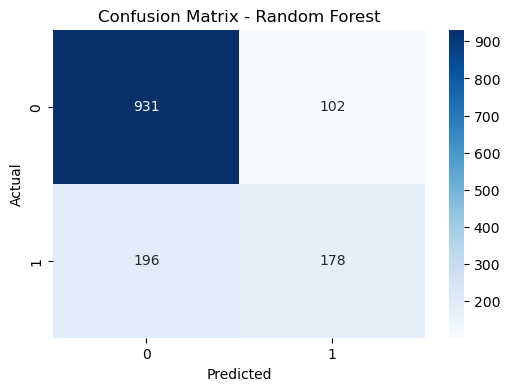

In [69]:
plt.figure(figsize=(6,4)) 
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt="d", cmap="Blues") 
plt.title("Confusion Matrix - Random Forest") 
plt.xlabel("Predicted") 
plt.ylabel("Actual") 
plt.show()

## Feature Importance

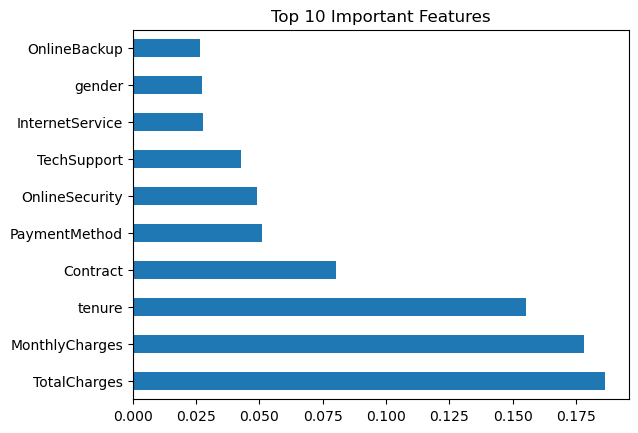

In [80]:
feat_importances = pd.Series(rf_model.feature_importances_, index=X.columns) 
feat_importances.nlargest(10).plot(kind='barh') 
plt.title("Top 10 Important Features") 
plt.show()

In [88]:
raw_df = pd.read_csv("Telco-Customer-Churn.csv")
raw_df = raw_df.replace(" ", np.nan).dropna()
raw_df["TotalCharges"] = pd.to_numeric(raw_df["TotalCharges"])
export_base = raw_df.copy()
df = raw_df.drop("customerID", axis=1).copy()
le = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = le.fit_transform(df[col])
X = df.drop("Churn", axis=1)
y = df["Churn"]
X_train_df, X_test_df, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
test_idx = X_test_df.index
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_df)
X_test = scaler.transform(X_test_df)
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)
proba = rf_model.predict_proba(X_test)[:, 1]
pred  = (proba >= 0.5).astype(int)
export = export_base.loc[test_idx].copy()
export["Prediction"] = np.where(pred == 1, "Yes", "No")
export["Churn_Prob"] = proba
export.to_csv("Churn_Cleaned_With_Predictions.csv", index=False)
print("Export ready: Churn_Cleaned_With_Predictions.csv")

Export ready: Churn_Cleaned_With_Predictions.csv
